### Quantum Circuits

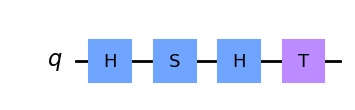

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)
qc.h(0)
qc.t(0)

qc.draw('mpl')

The quantum state after these operation will be:

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(1)     # QC abrevation for Quantum Circuit

qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)

ket0 = Statevector([1, 0])
V = ket0.evolve(qc)

V.draw('latex')

<IPython.core.display.Latex object>

## Quantum circuit for measuring Qbits to classical bits

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


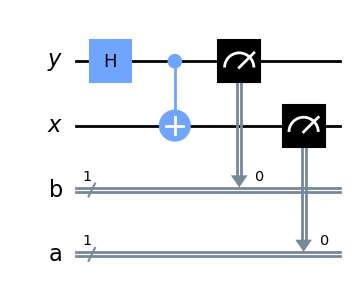

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import *

X = QuantumRegister(1, 'x')
Y = QuantumRegister(1, 'y')
A = ClassicalRegister(1, 'a')
B = ClassicalRegister(1, 'b')

circuit = QuantumCircuit(Y, X, B, A)    # X, Y are Qbits, and A, B are classical Bits

circuit.h(Y)
circuit.cx(Y, X)

simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()

print(statevector)

circuit.measure(Y, B)
circuit.measure(X, A)

circuit.draw(output= 'mpl')

## Applying an operator on a quantum state

Tensor producto of plus, |+> = $\frac{1}{2} |0> + \frac{1}{2} |1>$, state with another state, I_state = $\frac{1}{2} |0> + i\frac{1}{2} |1>$


In [1]:
from qiskit.quantum_info import Statevector, Operator
import numpy as np

plus = Statevector.from_label('+')

I_state = Statevector([1/np.sqrt(2), 1j/np.sqrt(2)])

psi = plus.tensor(I_state)

psi.draw('latex')

<IPython.core.display.Latex object>

###### Operating state |0> with different operators

In [2]:
from qiskit.quantum_info import Statevector, Operator
import numpy as np

a = 1/np.sqrt(2)
V = Statevector([1, 0])    # State Vector

"Operators"
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.j], [1.j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[a, a], [a, -a]])
S = Operator([[1, 0], [1, 1.j]])
T = Operator([[1, 0], [0, (1+1.j)/np.sqrt(2)]])

"Applying different Operators on a quantum state"
V.evolve(H)
V.evolve(T)
V.evolve(H)
V.evolve(T)
V.evolve(Z)

V.draw('latex')

<IPython.core.display.Latex object>

In [3]:
from qiskit.quantum_info import Statevector, Operator
import numpy as np

a = 1/np.sqrt(2)
V = Statevector([1, 0])    # State Vector

"Operators"
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.j], [1.j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[a, a], [a, -a]])
S = Operator([[1, 0], [1, 1.j]])
T = Operator([[1, 0], [0, (1+1.j)/np.sqrt(2)]])

"Applying different Operators on a quantum state"
V = V.evolve(H)
V = V.evolve(T)
V = V.evolve(H)
V = V.evolve(T)
V = V.evolve(Z)

V.draw('latex')


<IPython.core.display.Latex object>

Most of the operators are defined in Qiskit Quantum Circuit module, so we can access to them by dot (.) extansion.

In [6]:
#This is the same algorithm as in line 3.
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(1)     # QC abrevation for Quantum Circuit

qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)

ket0 = Statevector([1, 0])
V = ket0.evolve(qc)

V.draw('latex')

<IPython.core.display.Latex object>

In [9]:
from qiskit.quantum_info import Statevector as S_V, Operator
import numpy as np
a = 1/np.sqrt(2)

"Defining Two states"
zero, one = S_V.from_label('0'), S_V.from_label('1')

State = zero.tensor(one)    #returns new `Statevector`(|0⟩⊗|1⟩)
State.draw('latex')

State_1 = S_V([a, a])
State_2 = S_V([a, 1.j*a])

State_1 = State_1.tensor(State_2)   #returns new `Statevector`(|state_2⟩⊗|State_1⟩)


X = Operator([ [0, 1],
                [1, 0] ])

I = Operator([  [1, 0],
                 [0, 1] ])
X.tensor(I)                   #returns new `Operator`  (|X⟩⊗|I⟩)

State_1.evolve(I ^ X).draw('latex')

<IPython.core.display.Latex object>

* Below, we write a CNOT operator and caluculate CNOT|Psi⟩

In [10]:
from qiskit.quantum_info import Statevector as S_V, Operator
import numpy as np
a = 1/np.sqrt(2)

Plus = S_V.from_label('+')  # here the '+' represent  √2/2(|0⟩+|1⟩)
Psi = S_V([a, 1.j*a])

Psi = Plus.tensor(Psi)

CX = Operator([ [1, 0, 0, 0],
                [0, 1, 0, 0], 
                [0, 0, 0, 1],
                [0, 0, 1, 0] ])
Psi.evolve(CX)
Psi.draw('latex')

<IPython.core.display.Latex object>

#### Challenge

* Can you create each of the Bell states using only single-qubit state vectors and the CNOT operator?

* Yes, We can Create.

In [13]:
from qiskit.quantum_info import Statevector as S_V, Operator
import numpy as np

Psi_1 = S_V([1/np.sqrt(2) , 1/np.sqrt(2)])

Psi_2 = S_V([1/np.sqrt(2) , -1/np.sqrt(2)])


ket0 = S_V([1, 0])     #  |0⟩
ket1 = S_V([0, 1])     #  |1⟩


"CNOT Operator"
CX = Operator([ [1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 0, 1], 
                [0, 0, 1, 0] ])

" Bell states"

'|Φ⁺⟩'
Phi_1 = Psi_1.tensor(ket0)
Phi_1.evolve(CX).draw('latex')

'|Φ⁻⟩'
Phi_2 = Psi_2.tensor(ket0)
Phi_2.evolve(CX).draw('latex')

' |Ψ⁺⟩ '
Psi_1 = Psi_1.tensor(ket1)
Psi_1.evolve(CX).draw('latex')

'|Ψ⁻⟩ '
Psi_2 = Psi_2.tensor(ket1)
Psi_2.evolve(CX).draw('latex')

<IPython.core.display.Latex object>